In [16]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

from fooof import FOOOF
from fooof import FOOOFGroup
import numpy as np
from utils.ratios import *
from fooof.utils import trim_spectrum
# Import some utilities for synthesizing some test data
from fooof.synth import gen_group_power_spectra, param_sampler, gen_power_spectrum

In [17]:
def gen_treatment_sample():
    sample = []
    
    sample.append(np.random.uniform(4, 7)) #Theta freq
    sample.append(np.random.uniform(.35,.75)) #Theta Amp
    sample.append(np.random.uniform(.25,1.05))#Theta SD
    
    sample.append(np.random.uniform(8, 10)) #slow Alpha freq
    sample.append(np.random.uniform(.25,.55)) #Alpha Amp
    sample.append(np.random.uniform(.25,1.05))#Alpha SD
    
    sample.append(np.random.uniform(18, 25)) #Beta freq
    sample.append(np.random.uniform(.4,.75)) #Beta Amp
    sample.append(np.random.uniform(.25,1.05))#Beta SD
    
    
    return sample

In [18]:
#Creats a single control simulated spectrum (Theta, slow peak alpha, beta)
def gen_control_sample():
    sample = []
    
    sample.append(np.random.uniform(4, 7)) #Theta freq
    sample.append(np.random.uniform(.35,.75)) #Theta Amp
    sample.append(np.random.uniform(.25,1.05))#Theta SD
    
    sample.append(np.random.uniform(8, 12)) #slow alpha freq
    sample.append(np.random.uniform(.25,.55)) #Alpha Amp
    sample.append(np.random.uniform(.25,1.05))#Alpha SD
    
    sample.append(np.random.uniform(18, 25)) #Beta freq
    sample.append(np.random.uniform(.4,.75)) #Beta Amp
    sample.append(np.random.uniform(.25,1.05))#Beta SD
    
    
    return sample

In [34]:
#This function will gather ratio data with slope 0 to slope (argument)
# Offset is assumed 0
def sim_vary_slope(slope):
    file = open("dat/Slope_sims","w")
    res = []
    
    for i in range(slope):
        bg = [0,i]
        
        #100 trails for each treatment and control sim
        treatmentFreq, treatmentPower, _ = gen_group_power_spectra(100, [1,50], bg,gen_treatment_sample(), nlvs=np.random.uniform(.005,.02)) 
        contFreq, contPower, _ = gen_group_power_spectra(100, [1,50], bg, gen_control_sample(), nlvs=np.random.uniform(.005,.02))

        treatment = FOOOFGroup(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)
        control = FOOOFGroup(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)
        
        treatment.fit(treatmentFreq,treatmentPower)
        control.fit(contFreq,contPower)
        
        res=ratios(treatment,control)
        writer = str(res[0]) + ", "+str(res[1])+ ", " +str(res[2])+"\n"
        file.write(writer)
        
    file.close()
    

In [35]:
sim_vary_slope(50)

Diff CF only: 0.15007420210422784
	
Diff ratio of average power set bands:  1.2540725552497713
	
Diff sum(power in band)/bandwidth:  1.566810574459656
Diff CF only: 0.48496578819142455
	
Diff ratio of average power set bands:  0.10854218426327517
	
Diff sum(power in band)/bandwidth:  0.43266302857173633
Diff CF only: 1.0426852315585922
	
Diff ratio of average power set bands:  0.048728431941358785
	
Diff sum(power in band)/bandwidth:  0.5238417744604155
Diff CF only: 0.36542625696081954
	
Diff ratio of average power set bands:  0.014154640669440388
	
Diff sum(power in band)/bandwidth:  0.5203721994961052
Diff CF only: 0.02934090137123757
	
Diff ratio of average power set bands:  0.0008245261775408075
	
Diff sum(power in band)/bandwidth:  0.5498329111516539
Diff CF only: 0.12577639860228107
	
Diff ratio of average power set bands:  0.012246204692331841
	
Diff sum(power in band)/bandwidth:  0.5561524974596365
Diff CF only: 0.38575778134763206
	
Diff ratio of average power set bands:  0.0

In [19]:
#Gen group of ADHD PSDs (slow alpha peak freq) + control PSD
bg = [0,1]

#100 trails for each adhd and control sim
treatmentFreq, treatmentPower, _ = gen_group_power_spectra(100, [1,50], bg,gen_treatment_sample(), nlvs=np.random.uniform(.005,.02)) 
contFreq, contPower, _ = gen_group_power_spectra(100, [1,50], bg, gen_control_sample(), nlvs=np.random.uniform(.005,.02))

treatment = FOOOFGroup(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)
control = FOOOFGroup(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)

In [20]:
treatment.fit(treatmentFreq,treatmentPower)
control.fit(contFreq,contPower)

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                            Number of power spectra in the Group: 100                             
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                                                  
          

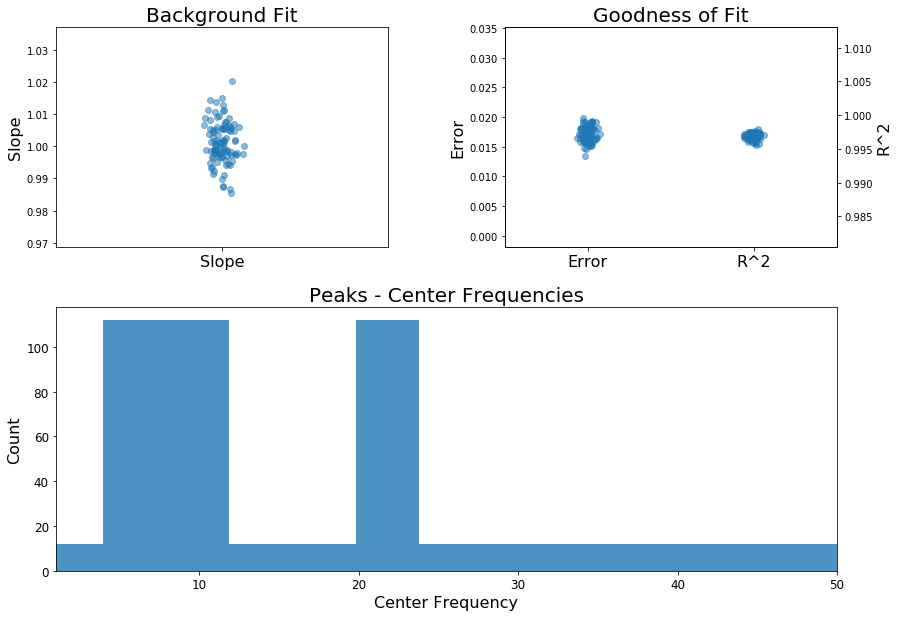

In [21]:
treatment.report()

In [22]:
res=ratios(treatment,control)

Diff CF only: 0.6444254469693789
	
Diff ratio of average power set bands:  0.08487418214373466
	
Diff sum(power in band)/bandwidth:  0.3671558377146533


In [23]:
res

[0.6444254469693789, 0.08487418214373466, 0.3671558377146533]

Diff CF only: 0.5188116018299821


In [7]:
gen_power_spectrum?

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):                               
                                         0.0017, 50.0021                                          
                                                                                                  
                                       3 peaks were found:                                        
          

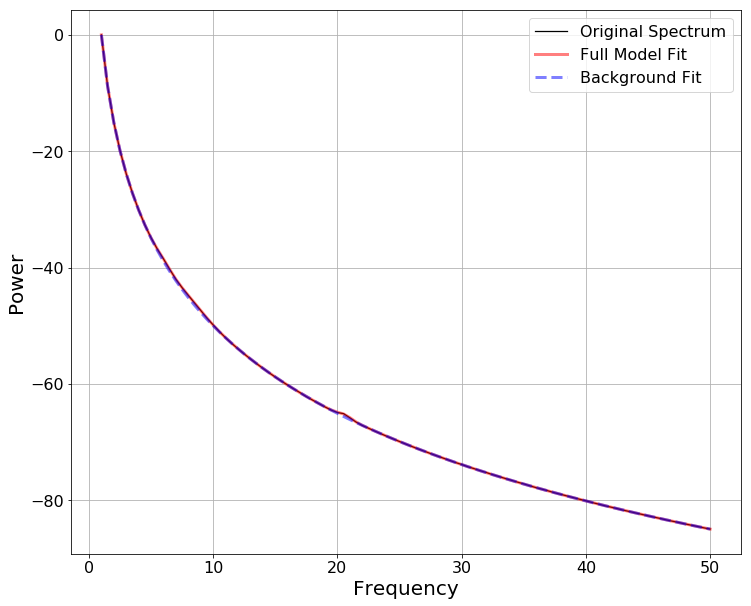

In [14]:
bg = [0,50]

#100 trails for each adhd and control sim
treatmentFreq, treatmentPower = gen_power_spectrum([1,50], bg,gen_treatment_sample(), nlv=np.random.uniform(.005,.02)) 

treatment = FOOOF(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)
treatment.add_data(treatmentFreq,treatmentPower)
treatment.report()